# Which board game should you play?

## 💾 The Data

You've come across a dataset titled `bgg_data.csv` containing details on over `20,000` ranked board games from the BoardGameGeek (BGG) website. BGG is the premier online hub for board game enthusiasts, hosting data on more than `100,000` games, inclusive of both ranked and unranked varieties. This platform thrives due to its active community, who contribute by posting reviews, ratings, images, videos, session reports, and participating in live discussions.

This specific dataset, assembled in `February 2021`, encompasses all ranked games listed on BGG up to that date. Games without a ranking were left out because they didn't garner enough reviews; for a game to earn a rank, it needs a minimum of `30` votes.

In this dataset, each row denotes a board game and is associated with some information.

| Column     | Description              |
|------------|--------------------------|
| `ID` | The ID of the board game. |
| `Name` | The name of the board game.|
| `Year Published` | The year when the game was published.|
| `Min Players` | The minimum number of player recommended for the game.|
| `Max Players` | The maximum number of player recommended for the game.|
| `Play Time` | The average play time suggested by game creators, measured in minutes.|
| `Min Age` | The recommended minimum age of players.|
| `Users Rated` | The number of users who rated the game.|
| `Rating Average` | The average rating of the game, on a scale of 1 to 10.|
| `BGG Rank` | The rank of the game on the BoardGameGeek (BGG) website.|
| `Complexity Average` | The average complexity value of the game, on a scale of 1 to 5.|
| `Owned Users` |  The number of BGG registered owners of the game.|
| `Mechanics` | The mechanics used by the game.|
| `Domains` | The board game domains that the game belongs to.|

**Source:** Dilini Samarasinghe, July 5, 2021, "BoardGameGeek Dataset on Board Games", IEEE Dataport, doi: https://dx.doi.org/10.21227/9g61-bs59.

In [212]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [137]:
import warnings
warnings.filterwarnings('ignore')


In [138]:
df = pd.read_csv('data/bgg_data.csv')
df.shape

(20343, 14)

## 💪 Challenge
Explore and analyze the board game data, and share the intriguing insights with your friends through a report. Here are some steps that might help you get started:

* Is this dataset ready for analysis? Some variables have inappropriate data types, and there are outliers and missing values. Apply data cleaning techniques to preprocess the dataset.
* Use data visualization techniques to draw further insights from the dataset.
* Find out if the number of players impacts the game's average rating.

# Executive Summary

We have performed the following main steps:
- Run a basic EDA of the whole dataset.
- Analyse the empty/null data and work on it.
- Analyse single column most frequent values, and analyse high cardinality ones in-depth, like: Year Published, Users Rated, and Max Players.
- Check present categorical values.
- Feature Extraction
- Correlation of 'Rating Average' with number of players columns and others.

A summary of main actions taken are:

- We dropped rows where ID is null, since were few and missing this value is bad quality indication.
- We have dropped the Domain column due to high nulls ratio.
- 2017 was the year with more publicated games.
- Top ten years are: 2017, 2016, 2018, 2019, 2015, 2014, 2013, 2012, 2011, 2010
- Firs publication year, 3500 a.c!!, there are 10 board games published before a.c.
- Most common Max Player values are: 4, 2, 6, 5 and 8, with a significant distance to following ones.
- Highest Max players values seem to have a ceiling value at 999.
- No general correlation observed between the columns Min, Max Players and Rating Average.
- For low Max Players values, between 2 and 10, there is a light correlation to rating average values between 5 and 8.
- Same for the pair Min Players and Rating Average, only games with 2 min players show a correlation to a rated average around 6 points.
- The only variable that shows a significant correlation(negative) with 'Rating Average' is 'BGG Rank', it becomes stronger for BGG Rank values higher than 10000.

# Basic EDA

##### Shape

In [139]:
df.shape

(20343, 14)

##### List of columns

In [140]:
df.columns.tolist()

['ID',
 'Name',
 'Year Published',
 'Min Players',
 'Max Players',
 'Play Time',
 'Min Age',
 'Users Rated',
 'Rating Average',
 'BGG Rank',
 'Complexity Average',
 'Owned Users',
 'Mechanics',
 'Domains']

##### Data types

In [141]:
df.dtypes

ID                    float64
Name                   object
Year Published        float64
Min Players             int64
Max Players             int64
Play Time               int64
Min Age                 int64
Users Rated             int64
Rating Average        float64
BGG Rank                int64
Complexity Average    float64
Owned Users           float64
Mechanics              object
Domains                object
dtype: object

##### Samples

In [142]:
df.head(3)

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains
0,174430.0,Gloomhaven,2017.0,1,4,120,14,42055,8.79,1,3.86,68323.0,"Action Queue, Action Retrieval, Campaign / Bat...","Strategy Games, Thematic Games"
1,161936.0,Pandemic Legacy: Season 1,2015.0,2,4,60,13,41643,8.61,2,2.84,65294.0,"Action Points, Cooperative Game, Hand Manageme...","Strategy Games, Thematic Games"
2,224517.0,Brass: Birmingham,2018.0,2,4,120,14,19217,8.66,3,3.91,28785.0,"Hand Management, Income, Loans, Market, Networ...",Strategy Games


In [143]:
df.sample(2).T

,4283,5963
ID,176606.0,174926.0
Name,"Rattle, Battle, Grab the Loot",Wizards of the Wild: Deluxe Edition
Year Published,2015.0,2015.0
Min Players,2,2
Max Players,5,4
Play Time,60,45
Min Age,8,10
Users Rated,1014,156
Rating Average,6.17,6.96
BGG Rank,4285,5965


In [144]:
df.tail(3)

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains
20340,5048.0,Candy Land,1949.0,2,4,30,3,4006,3.18,20342,1.08,5788.0,Roll / Spin and Move,Children's Games
20341,5432.0,Chutes and Ladders,-200.0,2,6,30,3,3783,2.86,20343,1.02,4400.0,"Dice Rolling, Grid Movement, Race, Roll / Spin...",Children's Games
20342,11901.0,Tic-Tac-Toe,-1300.0,2,2,1,4,3275,2.68,20344,1.16,1374.0,"Paper-and-Pencil, Pattern Building","Abstract Games, Children's Games"


##### Info table

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20343 entries, 0 to 20342
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  20327 non-null  float64
 1   Name                20343 non-null  object 
 2   Year Published      20342 non-null  float64
 3   Min Players         20343 non-null  int64  
 4   Max Players         20343 non-null  int64  
 5   Play Time           20343 non-null  int64  
 6   Min Age             20343 non-null  int64  
 7   Users Rated         20343 non-null  int64  
 8   Rating Average      20343 non-null  float64
 9   BGG Rank            20343 non-null  int64  
 10  Complexity Average  20343 non-null  float64
 11  Owned Users         20320 non-null  float64
 12  Mechanics           18745 non-null  object 
 13  Domains             10184 non-null  object 
dtypes: float64(5), int64(6), object(3)
memory usage: 2.2+ MB


# Analyse null data

##### How many non nulls and nulls are?

In [146]:
df.agg(['count', lambda x: x.isnull().sum()]).T\
    .rename(columns={'<lambda>': 'nulls'})\
    .style.background_gradient(cmap='Blues')

,count,nulls
ID,20327,16
Name,20343,0
Year Published,20342,1
Min Players,20343,0
Max Players,20343,0
Play Time,20343,0
Min Age,20343,0
Users Rated,20343,0
Rating Average,20343,0
BGG Rank,20343,0


<AxesSubplot: >

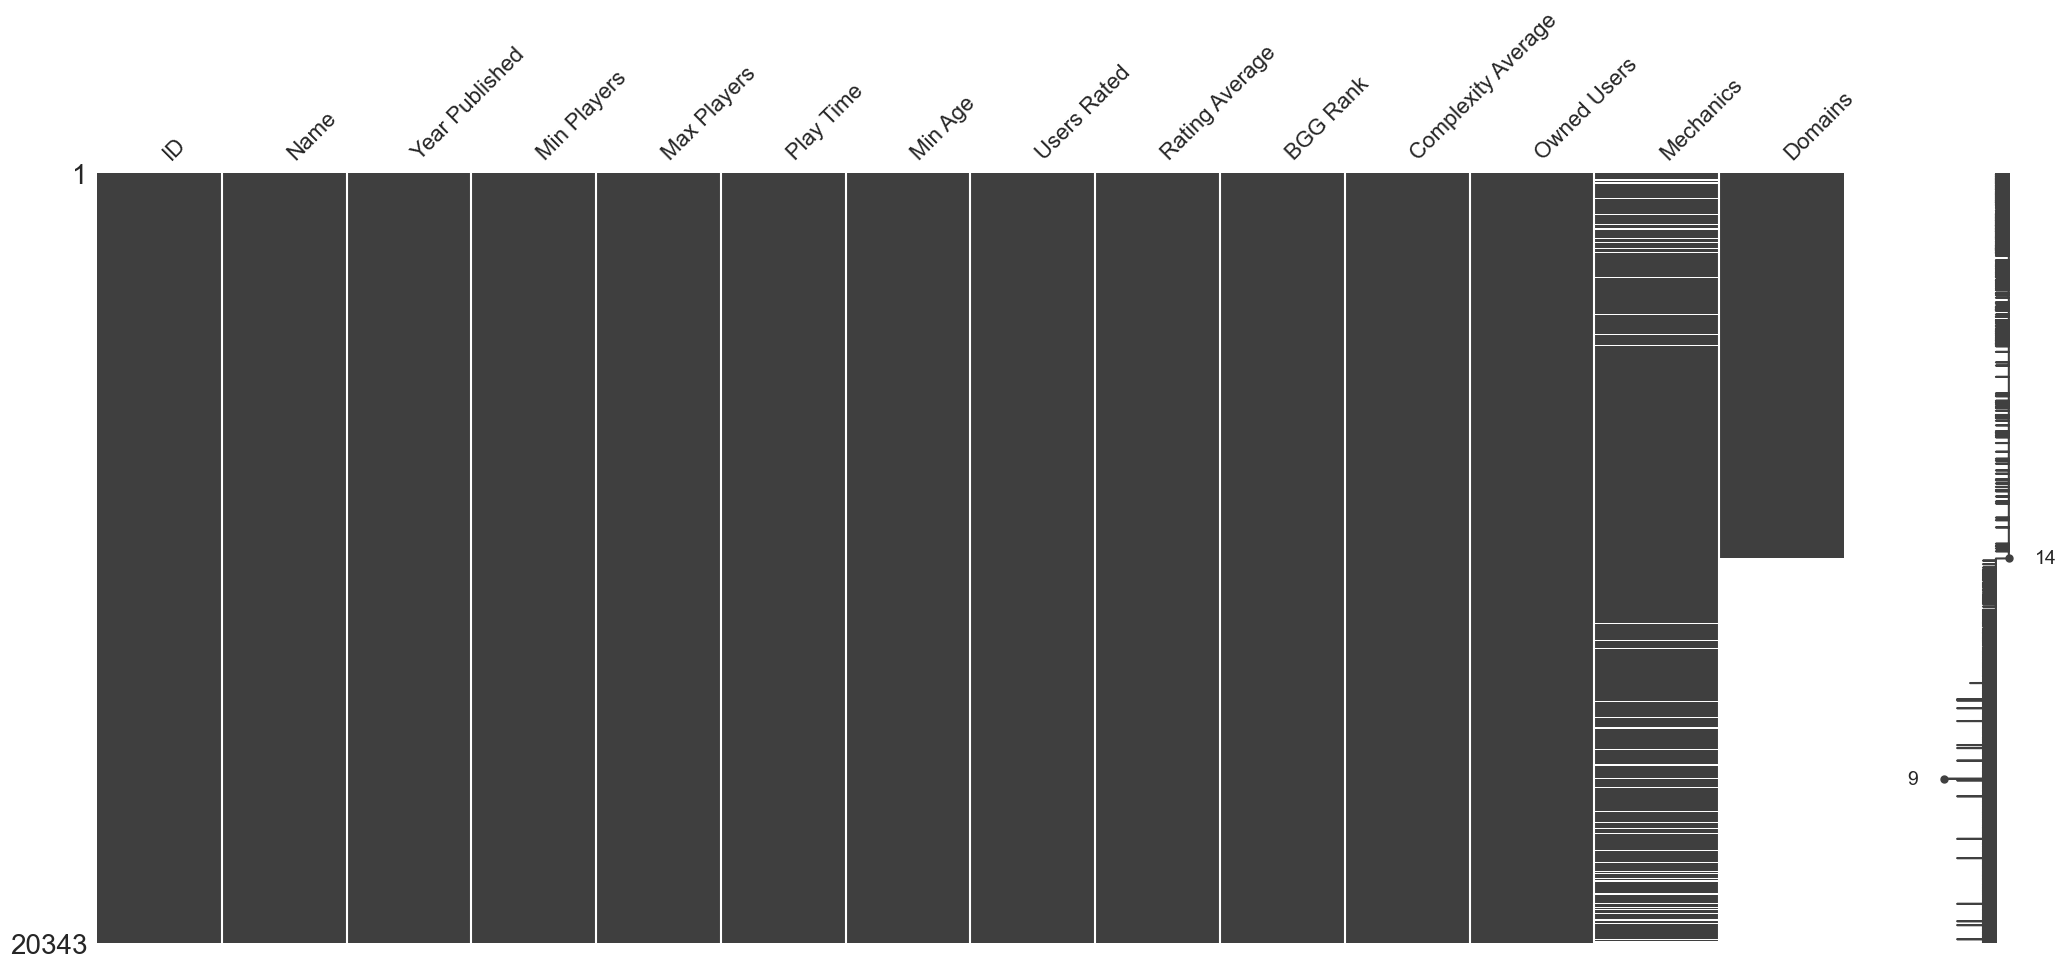

In [147]:
msno.matrix(df.sort_values('Domains'))

## When ID is null

In [148]:
col = 'ID'

In [149]:
df[
    df[col].isnull()
]

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains
10776,NaN,Ace of Aces: Jet Eagles,1990.0,2,2,20,10,110,6.26,10778,0.02,NaN,NaN,NaN
10835,NaN,Die Erben von Hoax,1999.0,3,8,45,12,137,6.05,10837,0.02,NaN,NaN,NaN
11152,NaN,Rommel in North Africa: The War in the Desert ...,1986.0,2,2,0,12,53,6.76,11154,0.04,NaN,NaN,NaN
11669,NaN,Migration: A Story of Generations,2012.0,2,4,30,12,49,7.20,11671,2.00,NaN,NaN,NaN
12649,NaN,Die Insel der steinernen Wachter,2009.0,2,4,120,12,49,6.73,12651,0.03,NaN,NaN,NaN
12764,NaN,Dragon Ball Z TCG (2014 edition),2014.0,2,2,20,8,33,7.03,12766,2.50,NaN,NaN,NaN
13282,NaN,Dwarfest,2014.0,2,6,45,12,82,6.13,13284,1.75,NaN,NaN,NaN
13984,NaN,Hus,NaN,2,2,40,0,38,6.28,13986,0.02,NaN,NaN,NaN
14053,NaN,Contrario 2,2006.0,2,12,0,14,37,6.30,14055,1.00,NaN,NaN,NaN
14663,NaN,Warage: Extended Edition,2017.0,2,6,90,10,49,7.64,14665,0.03,NaN,NaN,NaN


In [150]:
df[
    df[col].isnull()
]\
    .select_dtypes('float')\
    .agg(['min', 'max', 'mean']).T

,min,max,mean
ID,NaN,NaN,NaN
Year Published,1986.00,2020.00,2006.666667
Rating Average,3.16,7.64,5.985625
Complexity Average,0.02,2.50,0.593125
Owned Users,NaN,NaN,NaN


In [151]:
df[
    df[col].isnull()
].isnull().sum()

ID                    16
Name                   0
Year Published         1
Min Players            0
Max Players            0
Play Time              0
Min Age                0
Users Rated            0
Rating Average         0
BGG Rank               0
Complexity Average     0
Owned Users           16
Mechanics             16
Domains               16
dtype: int64

When ID is null, it happens that the last 3 columns are also fully null. Chancing a bad data gathering issue for these cases.

### Decide to drop rows with nulls

In [152]:
df = df[
    df[col].notnull()
]

## When Owned Users is null

The number of BGG registered owners of the game

In [153]:
col = 'Owned Users'

In [154]:
df[
    df[col].isnull()
]

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains
2828,202755.0,Guildhall Fantasy: Fellowship,2016.0,2,4,45,10,565,7.13,2830,2.00,NaN,"Hand Management, Take That, Set Collection",NaN
3590,196305.0,Guildhall Fantasy: Alliance,2016.0,2,4,45,10,360,7.20,3592,2.14,NaN,"Hand Management, Set Collection, Take That",NaN
3739,196306.0,Guildhall Fantasy: Coalition,2016.0,2,4,45,10,336,7.19,3741,2.13,NaN,"Hand Management, Set Collection, Take That",NaN
5807,289.0,Chariot Lords,1999.0,3,4,360,12,221,6.68,5809,0.03,NaN,"Area Movement, Variable Player Powers",NaN
9202,6813.0,Operation Market Garden: Descent into Hell,1985.0,2,2,120,12,94,6.72,9204,0.03,NaN,"Dice Rolling, Events, Grid Movement, Hexagon G...",NaN
9317,139.0,Hoax,1981.0,3,12,45,10,216,5.97,9319,1.38,NaN,"Deduction, Hidden Roles, Voting",NaN
10075,266756.0,Devil Boats: PT Boats in the Solomons,2021.0,1,1,60,14,49,7.84,10077,2.83,NaN,NaN,NaN


<AxesSubplot: >

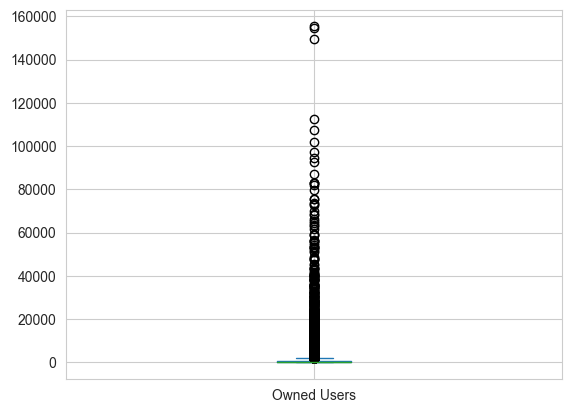

In [155]:
df[col].plot.box()

In [156]:
df[
    df[col].isnull()
]['Rating Average'].describe()

count    7.000000
mean     6.961429
std      0.581648
min      5.970000
25%      6.700000
50%      7.130000
75%      7.195000
max      7.840000
Name: Rating Average, dtype: float64

__Note:__ This few cases are not eye-catching in any of the other properties, they are within normal value ranges. Not a clear outcome or action from this one

## When Mechanics is null

The mechanics used by the game

In [157]:
col = 'Mechanics'

In [158]:
df[col].mode()

0    Hand Management
Name: Mechanics, dtype: object

In [159]:
df[col].value_counts().head()

Hand Management         432
Hexagon Grid            412
Dice Rolling            372
Roll / Spin and Move    369
Tile Placement          285
Name: Mechanics, dtype: int64

In [160]:
df[col].value_counts().tail()

Dice Rolling, Measurement Movement, Pick-up and Deliver, Variable Player Powers, Variable Set-up                1
Action Points, Dice Rolling, Grid Movement, Modular Board, Variable Phase Order, Variable Player Powers         1
Area Movement, Hidden Movement, Secret Unit Deployment, Team-Based Game                                         1
Auction/Bidding, Auction: Sealed Bid, Constrained Bidding, Pick-up and Deliver, Time Track, Worker Placement    1
Dice Rolling, Grid Movement, Race, Roll / Spin and Move, Square Grid                                            1
Name: Mechanics, dtype: int64

In [161]:
df[col].agg(['count', lambda x: x.isnull().sum()]).T\
    .rename(index={'<lambda>': 'nulls'})

count    18745
nulls     1582
Name: Mechanics, dtype: int64

In [162]:
df[
    df[col].isnull()
]

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains
1059,85256.0,Timeline: Inventions,2010.0,2,8,15,8,7257,6.71,1060,1.11,12448.0,NaN,Family Games
1150,113401.0,Timeline: Events,2011.0,2,8,15,8,4208,6.78,1151,1.10,7924.0,NaN,"Family Games, Party Games"
1216,131325.0,Timeline: Diversity,2012.0,2,8,15,8,3790,6.79,1217,1.07,7589.0,NaN,"Family Games, Party Games"
1343,99975.0,Timeline: Discoveries,2011.0,2,8,15,8,3506,6.73,1344,1.18,6855.0,NaN,Family Games
1397,145189.0,Timeline: Music & Cinema,2013.0,2,8,15,8,3090,6.75,1398,1.10,5986.0,NaN,"Family Games, Party Games"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20308,5314.0,Hangman,1976.0,2,2,10,6,942,4.21,20310,1.11,1187.0,NaN,Family Games
20314,4143.0,Guess Who?,1979.0,2,2,20,6,4715,4.80,20316,1.12,7576.0,NaN,Children's Games
20317,4149.0,Barrel of Monkeys,1965.0,1,0,10,3,781,3.57,20319,1.06,701.0,NaN,Children's Games
20328,5895.0,Hungry Hungry Hippos,1978.0,2,4,10,4,2361,4.12,20330,1.05,2568.0,NaN,Children's Games


__Note:__ not a clear outcome or action from this one

## When Domains is null

In [163]:
col = 'Domains'

In [164]:
df[col].agg(['count', lambda x: x.isnull().sum()]).T\
    .rename(index={'<lambda>': 'nulls'})

count    10184
nulls    10143
Name: Domains, dtype: int64

There are as much nulls as not nulls in the 'Domains' column, it is not very trustworthy.

##### Because of many nulls we decided to drop the column

In [165]:
df.drop(col, axis=1, inplace=True)

##### Comments

- Dropped rows where ID is null.
- We have dropped the Domain column due to high null ratio.
- No other action taken in other columns nulls

# Check single column values

## All columns most frequent values

In [166]:
for col in df.columns.tolist():
    print(
        df[col].value_counts().head(10)
    )
    print()

174430.0    1
7931.0      1
12479.0     1
120444.0    1
11466.0     1
158236.0    1
12963.0     1
220199.0    1
174218.0    1
231126.0    1
Name: ID, dtype: int64

Robin Hood          6
Saga                4
Gangster            4
Cosmic Encounter    4
Chaos               4
Gettysburg          4
Sabotage            3
Ali Baba            3
Artifact            3
Crazy Race          3
Name: Name, dtype: int64

2017.0    1273
2016.0    1257
2018.0    1253
2019.0    1134
2015.0    1131
2014.0     984
2013.0     850
2012.0     814
2011.0     735
2010.0     691
Name: Year Published, dtype: int64

2     14063
1      3269
3      2363
4       474
5        57
0        46
6        21
8        17
7        14
10        2
Name: Min Players, dtype: int64

4     6373
2     4069
6     3718
5     2813
8     1153
10     380
1      313
7      309
3      272
12     235
Name: Max Players, dtype: int64

30     3636
60     3003
45     2105
20     2023
120    1616
90     1589
15     1229
180     805
10      758


## Year Published

In [167]:
col = 'Year Published'

In [168]:
df[col].describe()

count    20327.000000
mean      1984.233335
std        214.081056
min      -3500.000000
25%       2001.000000
50%       2011.000000
75%       2016.000000
max       2022.000000
Name: Year Published, dtype: float64

In [169]:
df[col].head(10)

0    2017.0
1    2015.0
2    2018.0
3    2016.0
4    2017.0
5    2020.0
6    2015.0
7    2017.0
8    2016.0
9    2005.0
Name: Year Published, dtype: float64

In [170]:
", ".join(df[col].value_counts().head(10).index.astype(int).astype(str).tolist())

'2017, 2016, 2018, 2019, 2015, 2014, 2013, 2012, 2011, 2010'

In [171]:
dft = df[col].value_counts().head(10).reset_index()
dft.columns = [col, 'count']
dft

,Year Published,count
0,2017.0,1273
1,2016.0,1257
2,2018.0,1253
3,2019.0,1134
4,2015.0,1131
5,2014.0,984
6,2013.0,850
7,2012.0,814
8,2011.0,735
9,2010.0,691


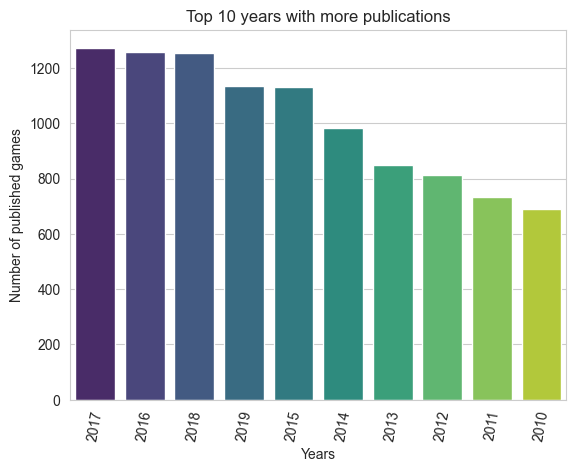

In [172]:
sns.barplot(x=dft[col].astype(int), y=dft['count'], 
            order=dft[col].astype(int), palette='viridis')
plt.ylabel("Number of published games")
plt.xlabel('Years')
plt.title("Top 10 years with more publications")
 
plt.xticks(rotation=80)
 
plt.show()



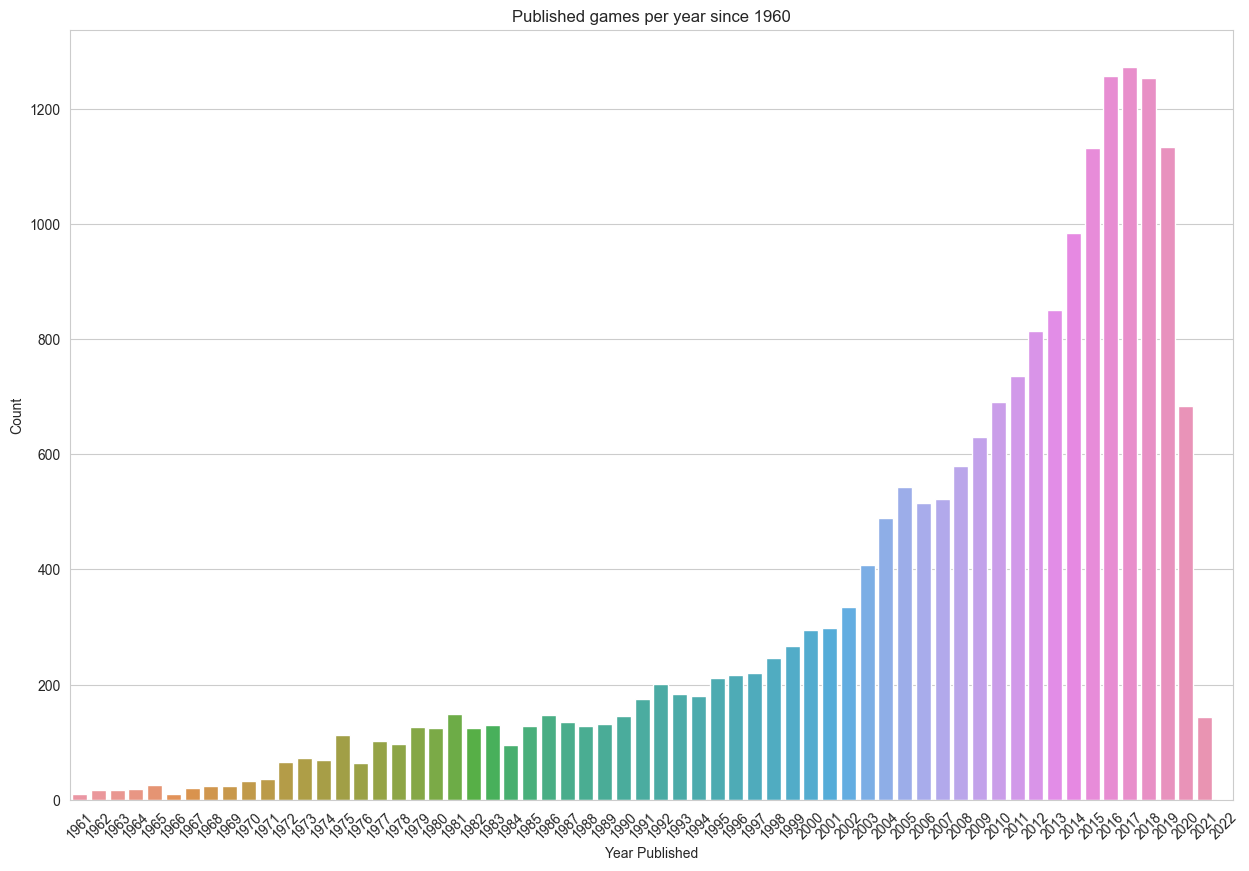

In [173]:
# Chart with year distribution since 1960
# (for better visualization)

plt.figure(figsize=(15, 10))
sns.set_style('whitegrid')

filtered_data = df[df[col]>1960][col].value_counts().reset_index()
filtered_data.columns = [col, 'count']

g = sns.barplot(x=col, y='count', data=filtered_data)
plt.xticks(rotation=45)
plt.title("Published games per year since 1960")
plt.ylabel("Count")
g.set_xticklabels(filtered_data[col].sort_values().astype(int))

plt.show()


<AxesSubplot: >

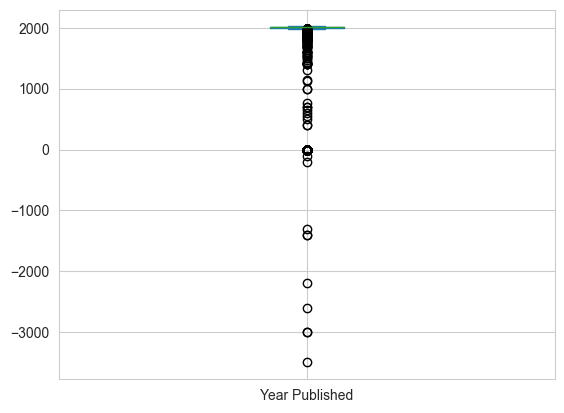

In [174]:
df[col].plot.box()

##### Games published a.c.

In [175]:
df[
    df[col]<0
].agg(['count', 'nunique', lambda x: x.isnull().sum()]).T\
    .rename(columns={'<lambda>': 'nulls'})\
    .style.background_gradient(cmap='Blues')

,count,nunique,nulls
ID,10,10,0
Name,10,10,0
Year Published,10,8,0
Min Players,10,2,0
Max Players,10,3,0
Play Time,10,6,0
Min Age,10,6,0
Users Rated,10,10,0
Rating Average,10,10,0
BGG Rank,10,10,0


__Comments__:

- 2017 was the year with more publicated games.
- Top ten years are: 2017, 2016, 2018, 2019, 2015, 2014, 2013, 2012, 2011, 2010
- Firs publication year, 3500 a.c!!
- The distribution is concentrated in over 1950s, that is shows flatten due to a such wide full range that goes to 3500 a.c.
- Number of games published before a.c are 10.

## Users Rated

The number of users who rated the game.


In [176]:
col = 'Users Rated'

<AxesSubplot: >

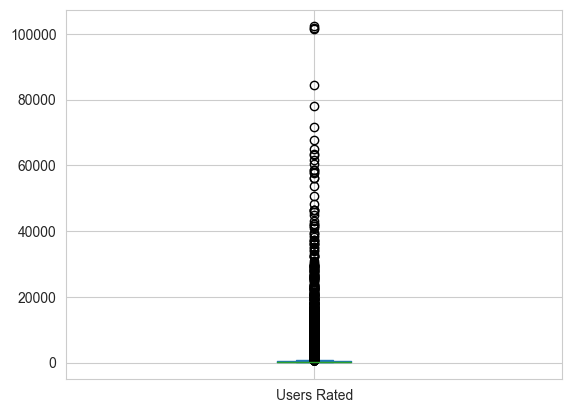

In [177]:
df[col].plot.box()

In [178]:
df[col].describe()

count     20327.000000
mean        841.579377
std        3512.876997
min          30.000000
25%          55.000000
50%         120.000000
75%         385.000000
max      102214.000000
Name: Users Rated, dtype: float64

<AxesSubplot: >

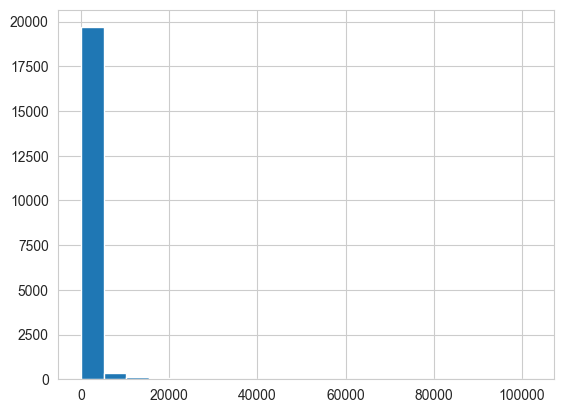

In [179]:
df[col].hist(bins=20)

In [180]:
qtl = df[col].quantile(.99)
qtl

14436.100000000024

In [181]:
df[
    df[col]>qtl
]

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics
0,174430.0,Gloomhaven,2017.0,1,4,120,14,42055,8.79,1,3.86,68323.0,"Action Queue, Action Retrieval, Campaign / Bat..."
1,161936.0,Pandemic Legacy: Season 1,2015.0,2,4,60,13,41643,8.61,2,2.84,65294.0,"Action Points, Cooperative Game, Hand Manageme..."
2,224517.0,Brass: Birmingham,2018.0,2,4,120,14,19217,8.66,3,3.91,28785.0,"Hand Management, Income, Loans, Market, Networ..."
3,167791.0,Terraforming Mars,2016.0,1,5,120,12,64864,8.43,4,3.24,87099.0,"Card Drafting, Drafting, End Game Bonuses, Han..."
6,182028.0,Through the Ages: A New Story of Civilization,2015.0,2,4,120,14,23061,8.43,7,4.41,26985.0,"Action Points, Auction/Bidding, Auction: Dutch..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8601,1294.0,Clue,1949.0,2,6,45,8,17534,5.67,8603,1.66,30807.0,"Deduction, Dice Rolling, Grid Movement, Memory..."
8884,258.0,Fluxx,1997.0,2,6,30,8,15820,5.67,8886,1.39,26878.0,"Hand Management, Set Collection"
19513,181.0,Risk,1959.0,2,6,120,10,30235,5.59,19515,2.08,47143.0,"Area Movement, Dice Rolling, Player Eliminatio..."
20227,2223.0,UNO,1971.0,2,10,30,6,21211,5.40,20229,1.12,38337.0,"Hand Management, Lose a Turn, Matching, Take That"


<AxesSubplot: >

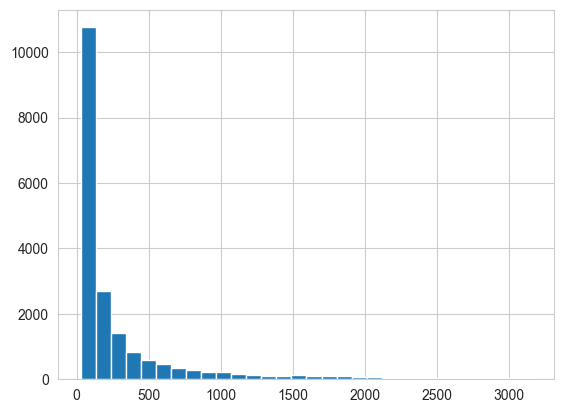

In [182]:
df[
    df[col]<df[col].quantile(.95)
][col].hist(bins=30)

<AxesSubplot: >

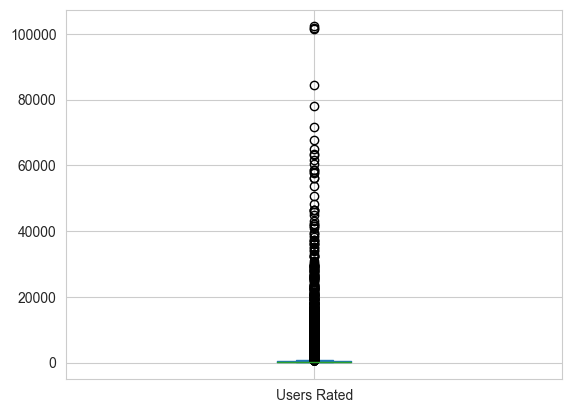

In [183]:
df[col].plot.box()

<AxesSubplot: >

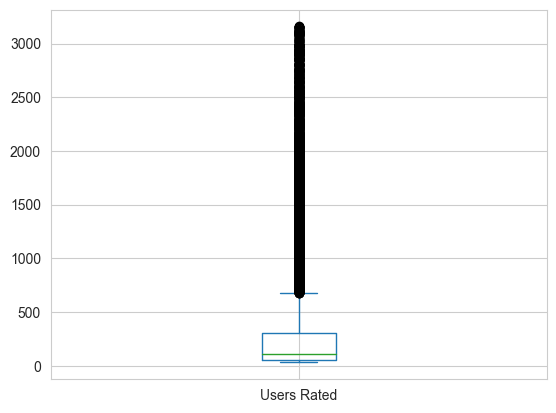

In [184]:
df[
    df[col]<df[col].quantile(.95)
][col].plot.box()

__Comments__:

- As 'Years Published' this property is highly concentrated with values less than 400, although the maximum of users rated a game is 102214.

## Max Players

In [185]:
col = 'Max Players'

In [186]:
df[col].agg(['count', 'nunique', lambda x: x.isnull().sum()]).T

count       20327
nunique        54
<lambda>        0
Name: Max Players, dtype: int64

In [187]:
df[col].value_counts().head(10)

4     6373
2     4069
6     3718
5     2813
8     1153
10     380
1      313
7      309
3      272
12     235
Name: Max Players, dtype: int64

In [188]:
df[col].describe()

count    20327.000000
mean         5.672898
std         15.237172
min          0.000000
25%          4.000000
50%          4.000000
75%          6.000000
max        999.000000
Name: Max Players, dtype: float64

<AxesSubplot: xlabel='Max Players', ylabel='count'>

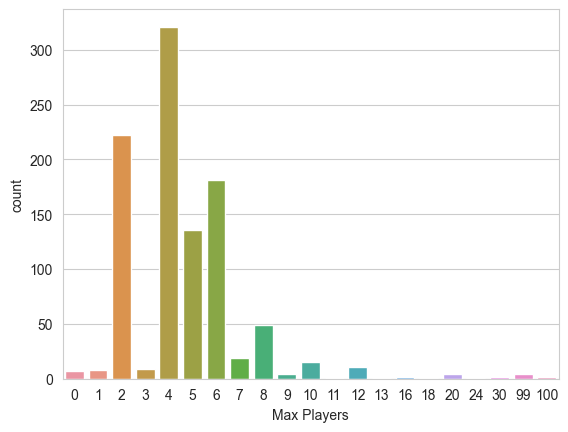

In [189]:
sns.countplot(x=col, data=df.sample(1000))

After a few runs, we can get a quick overview of the most common values.

In [190]:
df[col].sort_values().tail(10)

4770     100
125      100
5820     120
9983     127
16539    163
4913     200
18781    362
7025     999
8516     999
10813    999
Name: Max Players, dtype: int64

### Bucketize Max Players

##### Finding good limits for creating groups/buckets of the Max Players values.

<AxesSubplot: >

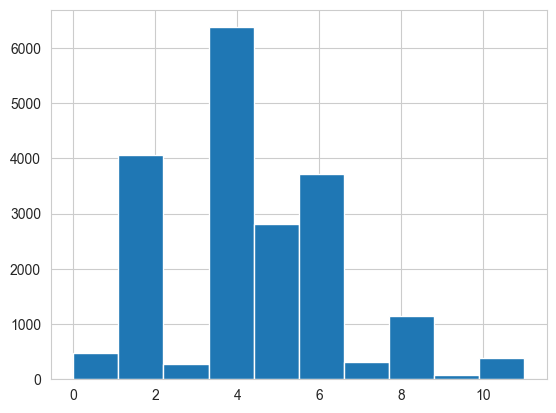

In [191]:
df[
    df[col]<12
][col].hist()

<AxesSubplot: >

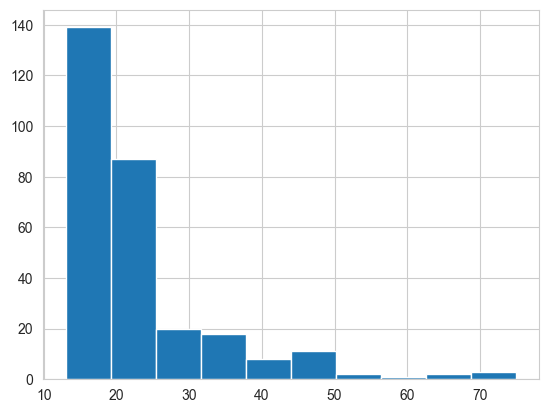

In [192]:
df[
    (df[col]>12) &
    (df[col]<80) 
][col].hist()

<AxesSubplot: >

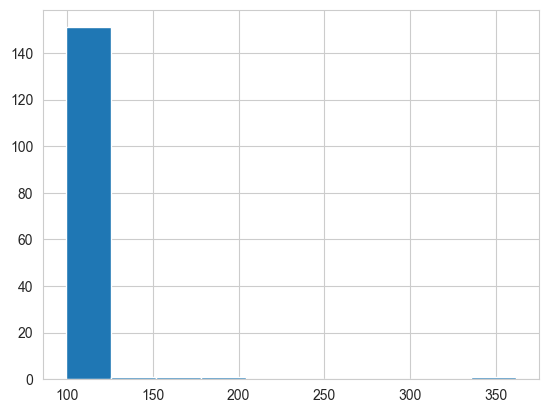

In [193]:
df[
    (df[col]>80) &
    (df[col]<400) 
][col].hist()

<AxesSubplot: >

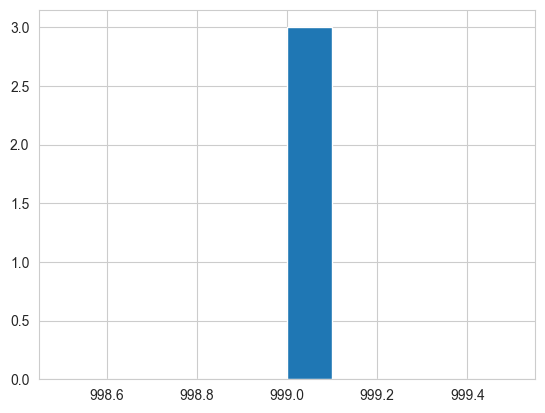

In [194]:
df[
    (df[col]>400)
][col].hist()

<AxesSubplot: >

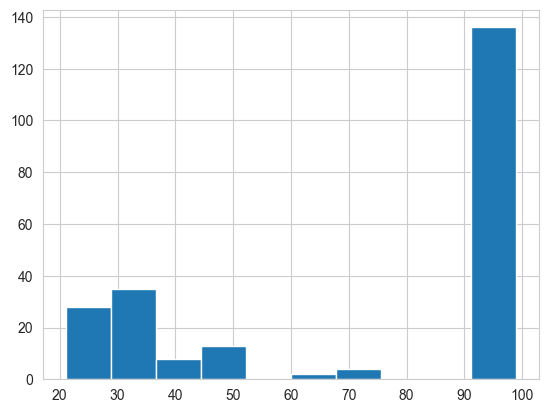

In [195]:
df[
    (df[col]>20) &
    (df[col]<100) 
][col].hist()

##### We can bucketize groups of values of this property.


In [196]:
df['max-players-group'] = pd.cut(df['Max Players'], 
       [0, 12, 80, 400, 1000], 
       labels=[12, 80, 400, 1000],
       include_lowest=True)

In [197]:
df['max-players-group'].value_counts()

12      19878
80        291
400       155
1000        3
Name: max-players-group, dtype: int64

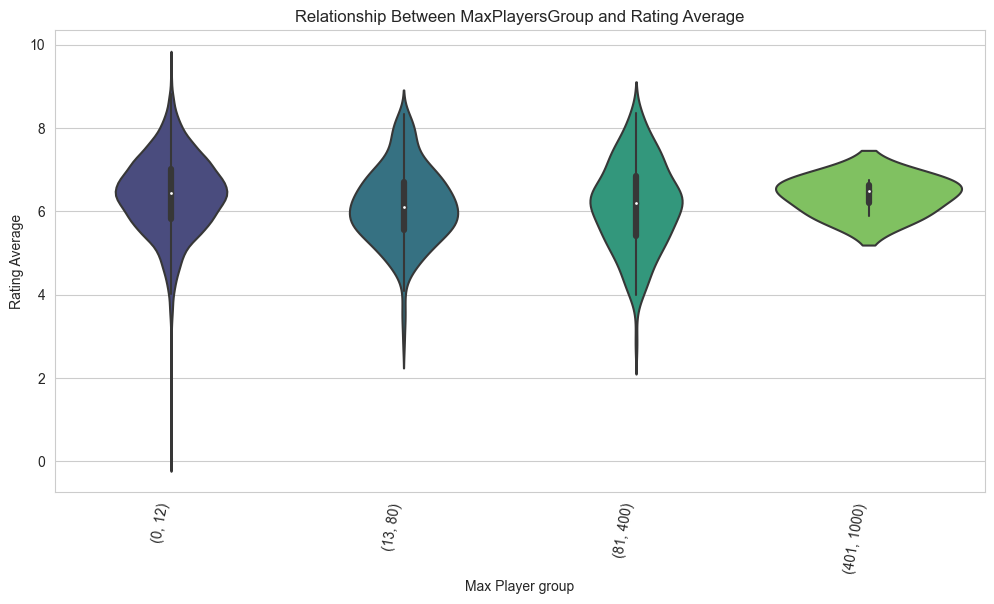

In [198]:
plt.figure(figsize=(12, 6))
g = sns.violinplot(data=df, 
               x='max-players-group', 
               y='Rating Average', 
               palette='viridis')

plt.title("Relationship Between MaxPlayersGroup and Rating Average")
plt.xlabel("Max Player group")
plt.ylabel("Rating Average")
plt.xticks(rotation=80, ha='right')

xlabels = ["(0, 12)", "(13, 80)", "(81, 400)", "(401, 1000)"]
g.set_xticklabels(xlabels)

plt.show()
 



__Comments__:

- All top values are low values.
- Values 4, 2, 6, 5 and 8 are the most common max player values, with a significant different with following ones.
- Highest Max players values seem to have a ceiling value at 999.
- Above a 100 there are almost no other options.
- We can see how the different created groups of 'Max Player' values behave differently in rating the games.
- For games with 12 max players or more ensures a rating average higher than 2, and above 400 max players, it increases again with a floor of 5.

# Check categorical cols

In [199]:
s = df['Mechanics'].str.split(",").explode().str.strip().str.split("/").explode().str.strip()

In [200]:
"Number of unique mechanic values:", s.nunique()

('Number of unique mechanic values:', 194)

Text(0.5, 1.0, 'TOP 10 Common Mechanics')

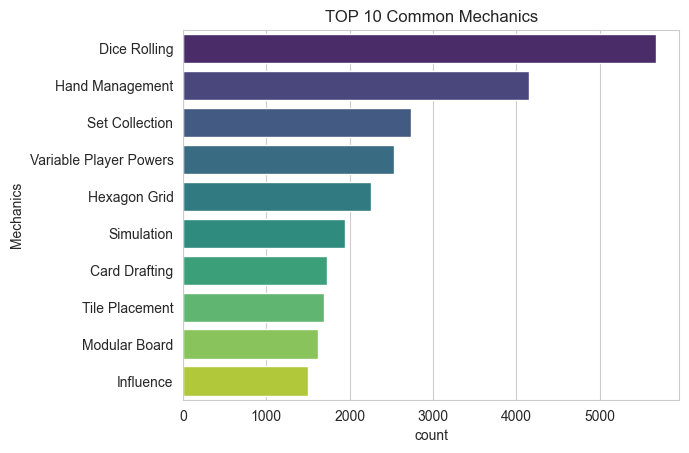

In [205]:
dft = s.value_counts().head(10).reset_index()
dft.columns = ['Mechanics', 'count']
g = sns.barplot(data=dft, x='count', y='Mechanics', 
                 palette='viridis')
g.set_title("TOP 10 Common Mechanics")


Text(0.5, 1.0, 'Least 10 Common Mechanics')

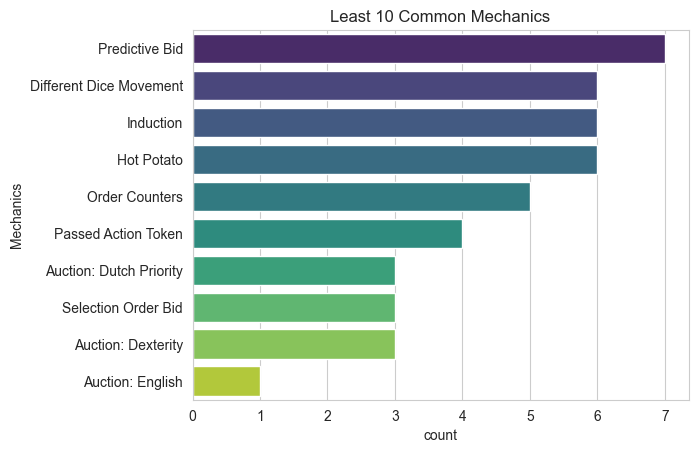

In [207]:
dft = s.value_counts().tail(10).reset_index()
dft.columns = ['Mechanics', 'count']
g = sns.barplot(dft, x='count', y='Mechanics', 
                 palette='viridis')
g.set_title("Least 10 Common Mechanics")


In [208]:
s.value_counts().head(10).reset_index()

,index,Mechanics
0,Dice Rolling,5672
1,Hand Management,4152
2,Set Collection,2733
3,Variable Player Powers,2534
4,Hexagon Grid,2253
5,Simulation,1944
6,Card Drafting,1730
7,Tile Placement,1692
8,Modular Board,1623
9,Influence,1502


# Feature Extraction

For board games with low 'Max Players' the 'Min Players' can add some value by spotting games with small or bigger range of players. So we calculate the difference between min and max players.

In [209]:
df.insert(df.columns.tolist().index('Max Players') + 1, 
              'num_range_players', 
               df['Max Players'] - df['Min Players'])

# Correlation

## Correlation Between all columns

In [213]:
dft = df.select_dtypes(np.number)

In [214]:
dft.columns.tolist()

['ID',
 'Year Published',
 'Min Players',
 'Max Players',
 'num_range_players',
 'Play Time',
 'Min Age',
 'Users Rated',
 'Rating Average',
 'BGG Rank',
 'Complexity Average',
 'Owned Users']

<AxesSubplot: >

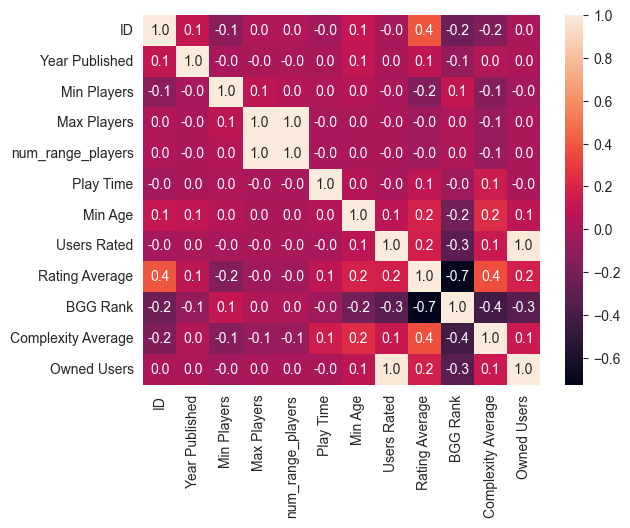

In [215]:
sns.heatmap(dft.corr(), annot=True, fmt=".1f")

## Correlation Between Min Players, Max Players and Rating Average

In [216]:
dft = df.filter(regex='Player|Rating')

In [217]:
dft.columns.tolist()

['Min Players', 'Max Players', 'Rating Average']

<AxesSubplot: >

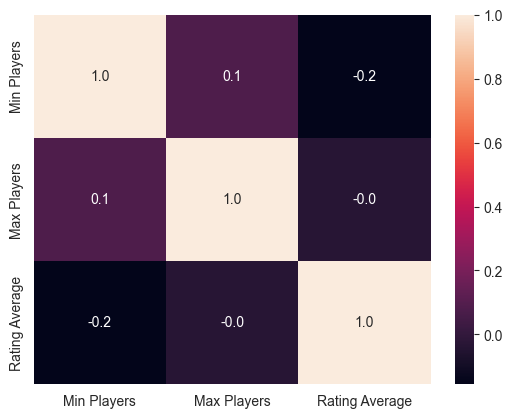

In [218]:
sns.heatmap(dft.corr(), annot=True, fmt=".1f")

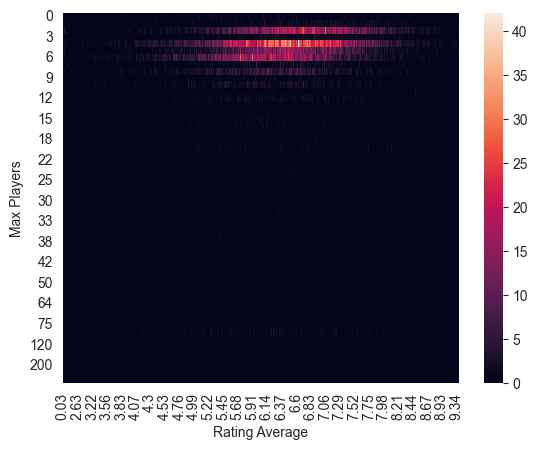

In [219]:
pd_crosstab = pd.crosstab(df["Max Players"], df["Rating Average"])
sns.heatmap(pd_crosstab)

# Rotate tick marks for visibility
plt.yticks(rotation=0)
plt.xticks(rotation=90)

plt.show()

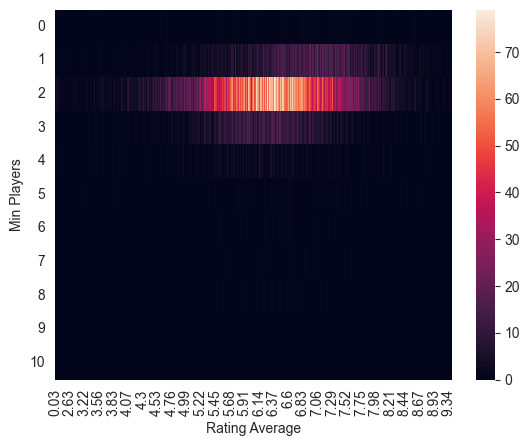

In [220]:
pd_crosstab = pd.crosstab(df["Min Players"], df["Rating Average"])
sns.heatmap(pd_crosstab)

# Rotate tick marks for visibility
plt.yticks(rotation=0)
plt.xticks(rotation=90)

plt.show()

##### Comments

- No general correlation observed between the columns Min, Max Plares and Rating Average.
- For low Max Players values, between 2 and 10, there is a light correlation to rating average values between 5 and 8.
- Same for the pair Min Players and Rating Average, only games with 2 min players show a correlation to a rated average around 6 points.

## Correlation Between BGG Rank and Rating Average

Although the challenge was to find out if number of players has a relationship with the rating average, since the only property that showed some correlation is 'BGG Rank', we explore this relationship.

<Figure size 1200x600 with 0 Axes>

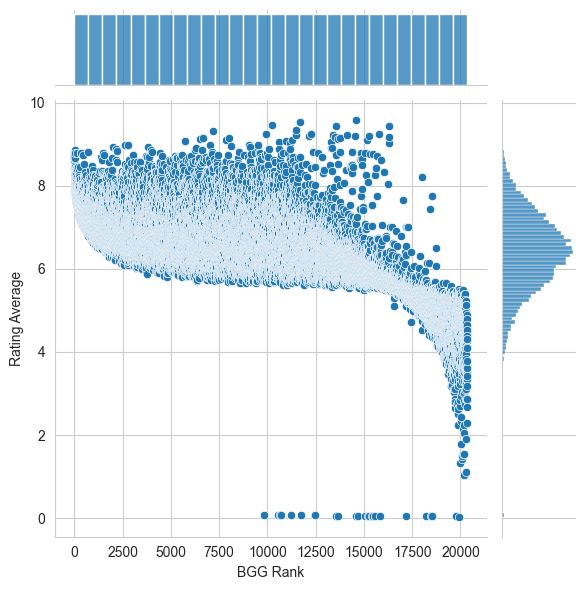

In [221]:
plt.figure(figsize=(12, 6))
sns.jointplot(data=df, x='BGG Rank', y='Rating Average')
plt.xlabel("BGG Rank")
plt.ylabel("Rating Average")
plt.show()
 

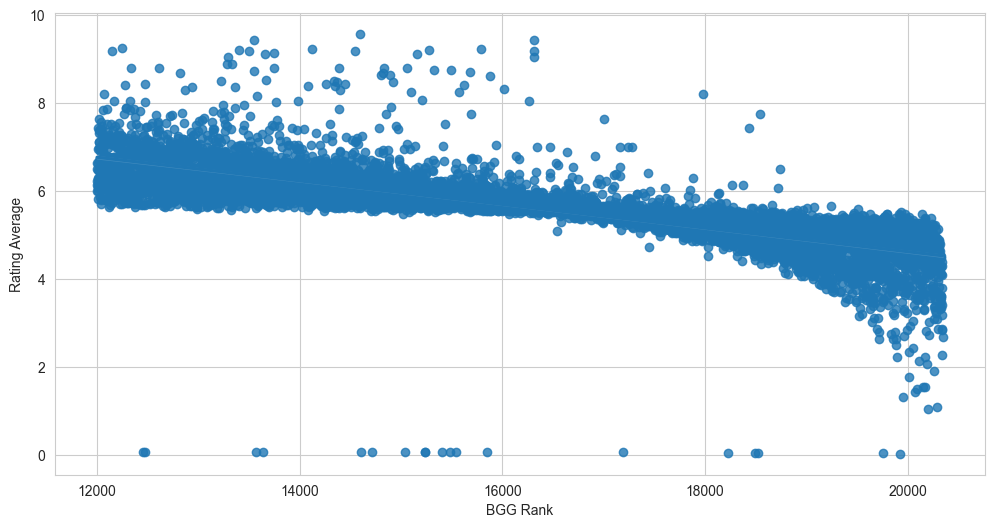

In [222]:
# Chart ...
plt.figure(figsize=(12, 6))
filtered = df[
    df['BGG Rank']>12000
]
sns.regplot(data=filtered, x='BGG Rank', y='Rating Average')
plt.xlabel("BGG Rank")
plt.ylabel("Rating Average")
plt.show()
 

<AxesSubplot: >

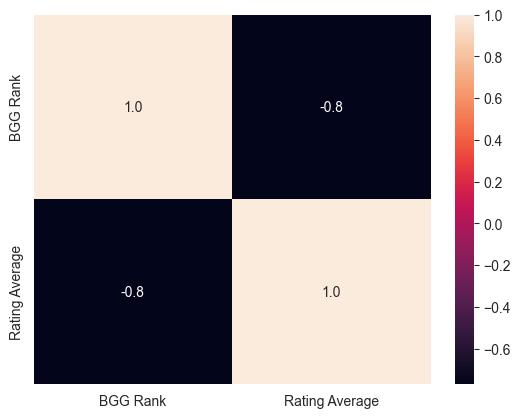

In [223]:
sns.heatmap(filtered[['BGG Rank', 'Rating Average']].corr(), annot=True, fmt=".1f")

__Comments__:

- The negative correlation increases significantly when BGG Rank is higher than 10000.